In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Introduction to least squares

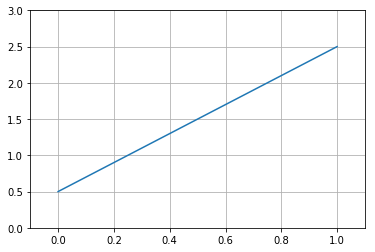

In [2]:
x = np.linspace(0, 1, 20)
m = 2
c = 0.5
y = m * x + c
plt.plot(x, y)
plt.axis([-0.1, 1.1, 0, 3])
plt.grid()

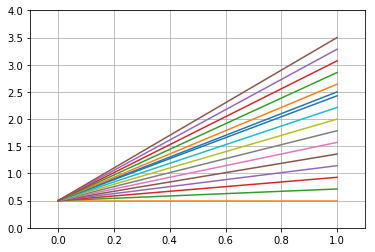

In [3]:
m_hat = np.linspace(0, 3, 15)
y_hat = np.dot(m_hat.reshape(-1, 1), x.reshape(1, -1)) + c
plt.plot(x, y)
for i in range(15):
    plt.plot(x, y_hat[i])
plt.axis([-0.1, 1.1, 0, 4])
plt.grid()

In [4]:
mse = np.mean((y - y_hat) ** 2, axis=1)

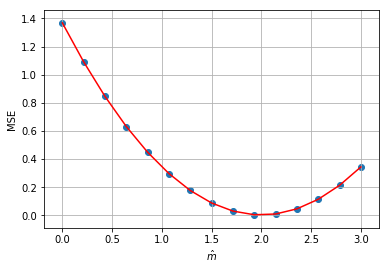

In [5]:
plt.plot(m_hat, mse, 'r-')
plt.scatter(m_hat, mse)
plt.xlabel('$\hat{m}$')
plt.ylabel('MSE')
plt.grid()

## Question: What does this curve look like?
## How many global and local minima does it have?

# Extending to two dimensions - predict both $m$ and $c$

In [6]:
from mpl_toolkits import mplot3d

In [7]:
c_hat = np.linspace(-1, 1, 25)

In [8]:
E = np.zeros((25, 15))
for i, m in enumerate(m_hat):
    for j, c in enumerate(c_hat):
        yhat = m * x + c
        E[j, i] = ((y - yhat) ** 2).mean()

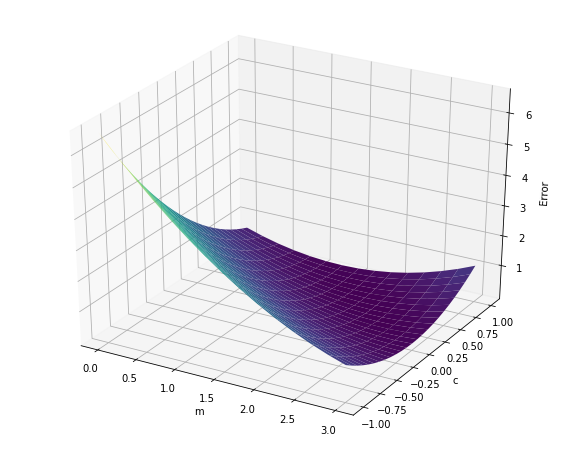

In [9]:
M, C = np.meshgrid(m_hat, c_hat)
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(M, C, E, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('m')
ax.set_ylabel('c')
_ = ax.set_zlabel('Error')

## Question: How many global and local minima does this surface have? Why?
### Hint: Least "_squares_" is a 2nd degree expression